# Homework 4 Confusion matrix,ROC,AUC

<span style="font-size: 20px;">Welcome to the course  **AI and Deep Learning**!</span>

In machine learning and statistical classification tasks , evaluating the performance of a model is crucial.The **Confusion matrix** , **ROC Curve（Receiver Operating Characteristic Curve）** , and **AUC(Area Under the ROC Curve)** are three core evaluation tools that measure the performance of a classification model from different perspectives.In this homework, we first revisit these three concepts. Subsequently, in a classification task, you are encouraged to obtain and analyze these metrics by yourself.

**Learning Goal:** After this homework, you will know:

<style>
ul li {
  list-style-type: disc;
  padding-left: 20px;
}
</style>

<ul>
  <li>How to construct a confusion matrix </li>
  <li>How to compute Accuracy , Precision , Recall , F1-score</li>
  <li>How to plot the ROC curve </li>
  <li>How to compute AUC</li>
</ul>

# Table of content

<style>
ol li {
  list-style-type: decimal-leading-zero;
  padding-left: 20px;
}
</style>

<ol>
  
  <li>Confusion Matrix
    <ol style="list-style-type:lower-alpha;">
      <li>Relationship between the Confusion Matrix and Type I , Type II errors</li>
      <li>Classification Performance Metrics</li>
        <ol class="roman">
          <li>Accuracy</li>
          <li>Precision</li>
          <li>Recall</li>
          <li>F1-Score</li>
        </ol>
       <li>Calculate the Confusion Matrix</li>
       <li> the concise implementation of Confusion Matrix</li>
    </ol>
  </li>
  <li>ROC Curve</li> 
    <ol style="list-style-type:lower-alpha;">
      <li>diagonal line</li>
      <li>upper left</li>
      <li>plot the ROC curve</li>
     </ol>
  </li>  
  <li>AUC</li>
    
  </li>  
  <li>Concise implementation</li>
  
  
  
</ol>

# 1-Confusion Matrix

The confusion matrix is a table that shows **the relationship between the predicted results of a classification model and the actual labels**. It provides a clear picture of how well the model performs on each class, including both correct and incorrect predictions. For a binary classification problem, the confusion matrix typically consists of four elements: True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN). These values can be used to calculate various performance metrics such as **accuracy, precision, recall, and F1-score**.

Below is  a confusion matrix for a binary classification scenario.

|                | **Predicted Positive**       | **Predicted Negative**       |
|----------------|------------------|------------------|
| **真实为正例** | True Positive (TP) | False Negative (FN) |
| **真实为负例** | False Positive (FP) | True Negative (TN)  |

In this table:

<style>
ul li {
  list-style-type: disc;
  padding-left: 20px;
}
</style>

<ul>
  <li>True Positive (TP): You correctly predicted positive. </li>
  <li>False Positive (FP): You incorrectly predicted positive when it was actually negative.</li>
  <li>True Negative (TN): You correctly predicted negative. </li>
  <li>False Negative (FN): You incorrectly predicted negative when it was actually positive.</li>
</ul>


**The terms "true" and "false" indicate whether the prediction was correct or incorrect, and "positive" and "negative" refer to the predicted outcome.**


<span style="font-size: 20px;"> **1.1  Relationship between the Confusion Matrix and Type I , Type II errors**
</span>

The Confusion Matrix is directly related to the concepts of Type I and Type II errors, which are fundamental in statistics and hypothesis testing. Here's how they relate:


<style>
ul li {
  list-style-type: disc;
  padding-left: 20px;
}
</style>

<ul>
  <li>Type I Error (False Positive) : This error occurs when a test incorrectly rejects a true null hypothesis. In the context of a Confusion Matrix for a binary classification problem, a Type I Error corresponds to a False Positive (FP). This is when the model predicts the positive class (e.g., disease present) when the actual class is negative (e.g., disease absent). </li>
  <li>Type II Error (False Negative): This error occurs when a test fails to reject a false null hypothesis. In terms of a Confusion Matrix, a Type II Error corresponds to a False Negative (FN). This happens when the model predicts the negative class when the actual class is positive.</li> 
  
</ul>









It's a critical tool for understanding the implications of different types of errors in the context of your specific application, such as the cost of a false positive versus a false negative. For example , in a medical testing scenario, whether a False Negative (FN) or a False Positive (FP) is considered more serious and why?

<span style="font-size: 20px;">  **1.2 Classification Performance Metrics**
</span>

We can derive four key metrics used to evaluate the performance of classification tasks from the confusion matrix.

<span style="font-size: 15px;">  **1.2.1 Accuracy**
</span>

Accuracy is the ratio of correctly predicted observations to the total observations. It is the simplest measure of performance for a classification model.



$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$



Accuracy gives you an overall idea of how often the model is correct. However, it can be misleading if the classes are imbalanced, as it might indicate a good performance just because one class is much more frequent than the others.

<span style="font-size: 15px;">  **1.2.2 Precision**
</span>

Precision is the ratio of correctly predicted positive observations to the total predicted positives.

$$
Precision = \frac{TP}{TP+FP}
$$


Precision tells you how many of the instances the model labeled as positive were actually positive. It is particularly important when the cost of a False Positive is high.

<span style="font-size: 15px;">  **1.2.3 Recall**
</span>

 Recall, also known as Sensitivity or True Positive Rate, is the ratio of correctly predicted positive observations to all observations in actual positive class.

$$
Recall = \frac{TP}{TP+FN}
$$


 Recall indicates how well the model can find all the positive instances. It is crucial when you want to capture most of the positive cases, such as in disease screening.

<span style="font-size: 15px;">  **1.2.4 F1-Score**
</span>

The F1-Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.




$$
F1=2\times\frac{\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}}
$$

The F1-Score is a good measure when you seek a balance between Precision and Recall, especially when you have an uneven class distribution. It is the harmonic mean of Precision and Recall, so it penalizes extreme values.

These metrics provide different perspectives on the performance of a classification model and are often used together to get a comprehensive understanding of the model's strengths and weaknesses.

For a certain model , It only has one set of these metrices if it estimates the **classes**  directly.However it corresponds to different set of metrices if it measures the **scores**  first,because different thresholds corresponds to different estimated labels. Later we will illustrate this in the simulation.

<span style="font-size: 20px;">  **1.3 Calculate the Confusion Matrix**
</span>

In [ ]:
import numpy as np


##YOUR CODE BEGINS HERE###


def confusion_matrix(y_true, y_pred, labels=None):
    """
   
    Parameters:
        y_true : array-like, true label
        y_pred : array-like, predicted label
        labels : list
    
    return:
        cm : ndarray,  (n_classes, n_classes) 
    """
    
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    n_classes = len(labels)
    
    # Initialization
    cm = np.zeros((n_classes, n_classes), dtype=int)
    
    # label to index
    label_to_idx = {label: idx for idx, label in enumerate(labels)}
    
    
    for true, pred in zip(y_true, y_pred):
        true_idx = label_to_idx[true]
        pred_idx = label_to_idx[pred]
        cm[true_idx, pred_idx] += 1
    
    return cm

    
    ###YOUR CODES ENDS HERE###

In [ ]:
# illustration
y_true = [0, 1, 0, 1, 1, 0, 1, 0]
y_pred = [0, 1, 1, 0, 1, 0, 1, 1]

# 计算混淆矩阵
cm = manual_confusion_matrix(y_true, y_pred)
print("manual confusion matrix:\n", cm)

手动实现的混淆矩阵:
 [[2 2]
 [1 3]]


You can also derive four key metrices from this confusion matrix.

In [ ]:
### YOUR CODE BEGINS HERE###


def metrics_from_cm(cm):
    """ calculate metrices from confusion matrix """
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]
    
    accuracy = (TP + TN) / np.sum(cm)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

print("metrices:", metrics_from_cm(cm))

###YOUR CODE ENDS HERE###

性能指标: {'Accuracy': 0.625, 'Precision': 0.6, 'Recall': 0.75, 'F1-score': 0.6666666666666665}


<span style="font-size: 20px;">  **1.4 the concise implementation of Confusion Matrix**
</span>

In [11]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]  # 真实标签
y_pred = [1, 0, 0, 1, 0, 1]  # 预测标签

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2 0]
 [1 3]]


# 2-ROC Curve

The ROC curve is a graphical representation that illustrates the performance of a classification model at **different threshold settings**. It plots the **Recall on the y-axis** and the **False Positive Rate (FPR) on the x-axis**. By varying the classification threshold, different TPR and FPR values are obtained, which are then used to draw the ROC curve. The closer the ROC curve is to the top-left corner of the plot, the better the model's performance. The ROC curve is particularly useful for comparing different models and understanding their trade-offs between Recall and specificity (1 - FPR).


<span style="font-size: 20px;">**2.1 diagonal line**
</span>

The diagonal line in an ROC curve represents the preformance of a **random classifier**,which indicates that the model has no discriminative power.

The diagonal line is defined by the equation:

$$
TPR = FPR
$$

$$
TPR = \frac{TP}{TP+FN}
$$


$$
FPR = \frac{FP}{FP+TN}
$$


For any threshold, the classifier correctly identifies positive and negative examples at the same rate, equivalent to guessing (e.g., flipping a coin).

I can demonstrate with an example!

|                | **Predicted Positive**       | **Predicted Negative**       |
|----------------|------------------|------------------|
| **真实为正例** | 0.7 | 0.3 |
| **真实为负例** | 0.7 | 0.3  |

Under this example , TPR=FPR=0.7. And we could also derive that the probability that classifier predicts any instance as positive is 70%. In a word , this is a random guess.

<span style="font-size: 20px;">**2.2 upper left**
</span>

Real-world models must perform above this diagonal line to be considered useful. The further the curve bends toward the **top-left corner**, the **stronger** the model’s ability to distinguish between classes.

The top-left corner (where False Positive Rate (FPR) = 0 and True Positive Rate (TPR) = 1) is the **"perfect classifier"** point.At this point, the model never misclassifies negatives as positives (FP = 0) and never misses positives (FN = 0).

| **Point on ROC Curve**  | **FPR** | **TPR** | **Interpretation**                      |
|-------------------------|---------|---------|----------------------------------------|
| **Top-Left (0,1)**      | 0       | 1       | Perfect classifier                     |
| **Bottom-Left (0,0)**   | 0       | 0       | Always predicts "negative" (useless)   |
| **Top-Right (1,1)**     | 1       | 1       | Always predicts "positive" (useless)   |
| **Diagonal Line**       | FPR=TPR | FPR=TPR | No better than random guessing         |

The ROC curve will always pass through the points (0,0) and (1,1).

The primary function of the ROC curve is to assist users in selecting the optimal classification threshold, rather than being directly used for comparing or choosing different classifier models.For models predicting **scores**,**Different thresholds correspond to different points,and join these points to produce an ROC curve.**

<span style="font-size: 20px;">**2.3 plot the ROC curve**
</span>

In [30]:

### import packages ###
### Sort Predictions by Probability in Descending Order###
### define thresholds###
### calculate TPR and FPR for Each threshold###
### Add boundary points (0,0) and (1,1) ###
### Return the FPR and TPR arrays###


### YOUR CODE BEGINS HERE ###
import numpy as np
import matplotlib.pyplot as plt

def manual_roc_curve(y_true, y_scores):
    # Sort Predictions by Probability in Descending Order
    desc_score_indices = np.argsort(y_scores)[::-1]
    y_scores_sorted = y_scores[desc_score_indices]
    y_true_sorted = y_true[desc_score_indices]
    
    # define thresholds
    thresholds = np.unique(y_scores_sorted)
    tpr = np.zeros(len(thresholds))  # True Positive Rate
    fpr = np.zeros(len(thresholds))  # False Positive Rate
    
    # calculate TPR and FPR for Each threshold
    for i, threshold in enumerate(thresholds):
        y_pred = (y_scores_sorted >= threshold).astype(int)
        
        TP = np.sum((y_pred == 1) & (y_true_sorted == 1))
        FP = np.sum((y_pred == 1) & (y_true_sorted == 0))
        TN = np.sum((y_pred == 0) & (y_true_sorted == 0))
        FN = np.sum((y_pred == 0) & (y_true_sorted == 1))
        
        tpr[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
        fpr[i] = FP / (FP + TN) if (FP + TN) > 0 else 0
    
    # Add boundary points (0,0) and (1,1)
    fpr = np.concatenate([[0], fpr, [1]])
    tpr = np.concatenate([[0], tpr, [1]])
    
    return fpr, tpr
                   
###YOUR CODE ENDS HERE###    
    


You can also examine by a simulation data!

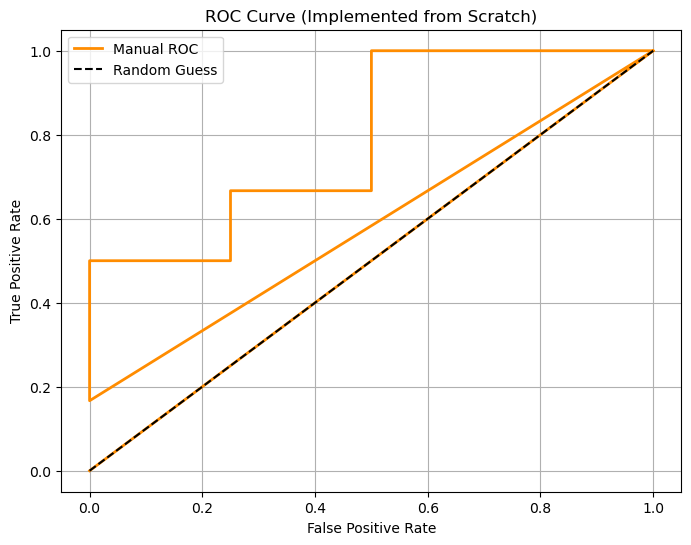

In [32]:
###generate Simulated Data###
### manually calculate the ROC curve###
###plot the ROC curve###
  
    
###YOUR CODE BEGINS HERE###  
    
# generate Simulated Data
np.random.seed(42)
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1])
y_scores = np.array([0.1, 0.3, 0.35, 0.4, 0.6, 0.55, 0.8, 0.7, 0.9, 0.95])

# manually calculate the ROC curve
fpr, tpr = manual_roc_curve(y_true, y_scores)



# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Manual ROC ')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Implemented from Scratch)')
plt.legend()
plt.grid(True)
plt.show()                   

### YOUR CODES ENDS HERE###

# 3-AUC

AUC is a quantitative measure of **the overall performance of a classification model**. It represents the area under the ROC curve and provides a single number to summarize the model's ability to distinguish between classes. The AUC value ranges from 0 to 1, with higher values indicating better model performance. An AUC of 0.5 suggests that the model performs no better than random guessing( ROC curve = diagonal line), while an AUC of 1 indicates a perfect classifier. 



AUC is especially valuable because it is threshold-independent and provides a comprehensive evaluation of the model's performance across all possible thresholds.

When comparing ROC curves of multiple models:

Although it's possible to plot the ROC curves of several models on the same graph, the ultimate goal is to observe which model has a higher AUC, rather than selecting a classifier based on the curve itself.



# 4-Concise implementation

Up to now,we have mastered the basic concepts of these topics,we can devise a classification task and by using these metrices to evaluate the performance of the classifier.

We use Logistic Regression model to deal with a binary classification problem.

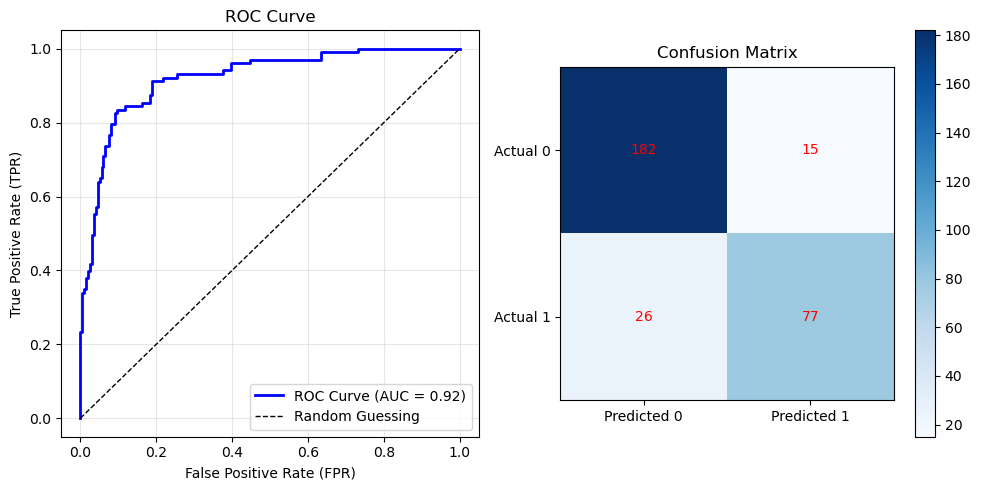

逻辑回归模型性能评估

Confusion Matrix:
[[182  15]
 [ 26  77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       197
           1       0.84      0.75      0.79       103

    accuracy                           0.86       300
   macro avg       0.86      0.84      0.84       300
weighted avg       0.86      0.86      0.86       300


AUC-ROC: 0.9225

最佳阈值: 0.3601
对应FPR: 0.0964, TPR: 0.8350


In [25]:
### import packages###
### Generate simulation data###
### split training/testing set###
### train a logistic regression model###
### predict the probability and label###
### calculate confusion matrix###
###plot the ROC curve , and calculate AUC###
### output###

### YOUR CODE BEGINS HERE###

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# 1. Generate simulation data
X, y = make_classification(
    n_samples=1000,      # sample size
    n_features=10,       # feature dimension
    n_classes=2,         # binary classification
    weights=[0.7, 0.3],  # weights of different classes, to simulate an imbalanced data(optional)
    random_state=42      # random seed
)

# 2. split training/testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 4. predict the probability and label
y_proba = model.predict_proba(X_test)[:, 1]  # return the probability of classifying as label=1（ROC/AUC）
y_pred = model.predict(X_test)               # hard classification result , we indicate the threshold as 0.5(confusion matrix)

# 5. compute evaluating metrices
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


## ROC,AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
#The function automatically iterates over all the probability values in `y_proba` as thresholds.

#For each threshold, it calculates the corresponding (False Positive Rate, True Positive Rate) points.

#By default, it adds two boundary points: (0,0) and (1,1).

auc = roc_auc_score(y_test, y_proba)

## classification report(precision/recall/F1-score)
report = classification_report(y_test, y_pred)

# 6. visulization
plt.figure(figsize=(10, 5))

##  plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

## confusion matrix(optional)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.tight_layout()
plt.show()



# 7. Print key metrices
print("="*50)
print("逻辑回归模型性能评估")
print("="*50)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)
print(f"\nAUC-ROC: {auc:.4f}")

# (optional)：output the best threshold
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)
best_idx = np.argmin(distances)
print(f"\n最佳阈值: {thresholds[best_idx]:.4f}")
print(f"对应FPR: {fpr[best_idx]:.4f}, TPR: {tpr[best_idx]:.4f}")

### YOUR CODES ENDS HERE###

of course you can train another binary classification model to compare the capacity of model! Among those binary classification models , here are some suggestions:



<style>
ul li {
  list-style-type: disc;
  padding-left: 20px;
}
</style>

<ul>
  <li>Logistic Regression model</li>
  <li>Support Vector Machine </li> 
  <li>Random Forest </li>
  <li>Neural Network</li>
</ul>